In [55]:
import pandas

In [56]:
MajorCityCSV = 'GlobalLandTemperaturesByMajorCity.csv'

In [106]:
mcPd = pandas.read_csv(
    MajorCityCSV,
    engine='pyarrow',
    dtype_backend='pyarrow'
)

mcPd['year'] = mcPd.dt.dt.year

In [108]:
mcPd.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849


In [51]:
print(mcPd.value_counts('Country').head(3))
print(mcPd.value_counts('Country').tail(3))
print(f'total: {mcPd.value_counts('Country').shape[0]}')

Country
India     36582
China     35444
Brazil    12930
Name: count, dtype: int64
Country
Angola    1893
Sudan     1857
Peru      1591
Name: count, dtype: int64
total: 49


In [59]:
print(mcPd.value_counts('City').head(3))
print(mcPd.value_counts('City').tail(3))
print(f'total: {mcPd.value_counts('City').shape[0]}')

City
Chicago    3239
Berlin     3239
Kiev       3239
Name: count, dtype: int64
City
Cape Town     1881
Umm Durman    1857
Lima          1591
Name: count, dtype: int64
total: 100


In [109]:
import seaborn

<Axes: xlabel='year', ylabel='AverageTemperature'>

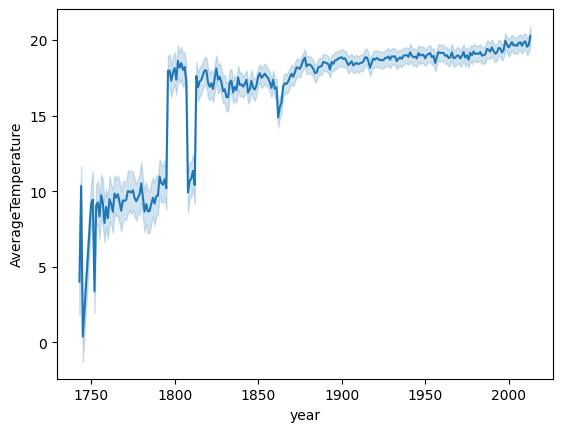

In [111]:
seaborn.lineplot(
    data = mcPd,
    x='year',
    y='AverageTemperature',
    # hue='City'
)

In [33]:
import seaborn
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [84]:
import numpy

In [ ]:


def uncertainty_by_TempAverageYear(data, feature='AverageTemperature'):
    df=data.copy()

    # se obtienen la tendencia
    descompose_T = seasonal_decompose(
        x=df[feature],
        model="additive",
        period=12
    )
    decompose_U = seasonal_decompose( # U de Uncertainty
        x=df[f"{feature}Uncertainty"],
        model="additive",
        period=12,
    )
    # se resumen la tendencia por cada 12 meses, media de un año
    T = descompose_T.trend.dropna().groupby(lambda x: x.year, sort=True).mean()
    U = decompose_U.trend.dropna().groupby(lambda x: x.year, sort=True).mean().abs()

    fig, ax = pyplot.subplots(figsize=(9, 4))
    ax.fill_between(T.index, T-U, T+U, color=(0.20, 0.45, 0.90, 0.18), linewidth=0)

    seaborn.lineplot(T + U, color=(0.20, 0.45, 0.50))
    seaborn.lineplot(T)
    seaborn.lineplot(T - U, color=(0.20, 0.45, 0.50))
    # pass

In [36]:
uncertainty_by_TempAverageYear(
    data=mcPd,
    feature='AverageTemperature'
)

ValueError: This function does not handle missing values